In [172]:
from pathlib import Path
home = Path.home()
#[x for x in home.iterdir()]

In [173]:
inpD = 'data/Lymphoma'
#[x for x in (home/inpD).iterdir()]

In [6]:
!pip install modin

    100% |████████████████████████████████| 174kB 2.4MB/s 
    100% |████████████████████████████████| 13.9MB 644kB/s 
    100% |████████████████████████████████| 73.0MB 136kB/s 
    100% |████████████████████████████████| 71kB 2.3MB/s 
tensorflow-gpu 1.11.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.0.0 which is incompatible.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.0 which is incompatible.
mxnet 1.3.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.20.0 which is incompatible.
mxnet-cu92mkl 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.0 which is incompatible.
mxnet-cu92mkl 1.3.0.post0 has requirement requests<2.19.0,>=2.18.4, but you'll have requests 2.20.0 which is incompatible.
allennlp 0.8.0 has requirement pytz==2017.3, but you'll have pytz 2018.5 which is incompatible.
  Found existing installation: numpy 1.15.2
    Uninstalling numpy-1.15.2:
      Successfu

In [71]:
inpF=home/inpD/"proteinGroups.txt"
import modin.pandas as pd
df = pd.read_table(home/inpD/"proteinGroups.txt")
df.describe()

,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides 161205_1_19913,Peptides 161205_10_29288,Peptides 161205_11_13476,Peptides 161205_12_22298,Peptides 161205_13_15972,Peptides 161205_14_16003,...,LFQ intensity H 161205_5_7730,LFQ intensity L 161205_6_23854,LFQ intensity H 161205_6_23854,LFQ intensity L 161205_7_27283,LFQ intensity H 161205_7_27283,LFQ intensity L 161205_8_16846,LFQ intensity H 161205_8_16846,LFQ intensity L 161205_9_1702,LFQ intensity H 161205_9_1702,id
count,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,5208.000000,...,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5.208000e+03,5208.000000
mean,3.544931,7.363671,6.814132,6.317588,3.616743,4.364823,3.298003,3.607335,3.811444,3.661674,...,4.552854e+07,4.414972e+07,3.723839e+07,5.362148e+07,3.743154e+07,4.284464e+07,3.876076e+07,3.898194e+07,4.191519e+07,2603.500000
std,3.084355,7.762031,7.611536,7.140725,4.786894,5.668569,4.938949,4.833387,5.036964,4.860842,...,2.617129e+08,3.969618e+08,2.169072e+08,4.983421e+08,2.296025e+08,3.704850e+08,2.208950e+08,3.189844e+08,2.491729e+08,1503.564432
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,2.553650e+05,1.038175e+05,2.498850e+05,2.716200e+05,1.372850e+05,2.279600e+05,1301.750000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.053150e+06,3.065500e+06,2.783350e+06,3.299250e+06,2.554100e+06,2.874950e+06,2.951950e+06,2.568050e+06,2.841100e+06,2603.500000
75%,5.000000,9.000000,8.000000,8.000000,5.000000,6.000000,4.000000,5.000000,5.000000,5.000000,...,1.611500e+07,1.392975e+07,1.351975e+07,1.592375e+07,1.323400e+07,1.409600e+07,1.451350e+07,1.268725e+07,1.472775e+07,3905.250000
max,40.000000,108.000000,108.000000,108.000000,63.000000,74.000000,65.000000,61.000000,68.000000,68.000000,...,9.356300e+09,2.113200e+10,8.056900e+09,2.023200e+10,9.254800e+09,1.474300e+10,7.931300e+09,1.427000e+10,9.927700e+09,5207.000000


In [72]:
df.isnull().sum().sort_index()/len(df)

Best MS/MS                             0.000000
Deamidation (NQ) site IDs              0.779570
Deamidation (NQ) site positions        0.779570
Evidence IDs                           0.000000
Fasta headers                          0.010753
Fraction 1                             0.140169
Fraction 2                             0.120584
Fraction 3                             0.125576
Fraction average                       0.000000
Gene names                             0.026114
Identification type 161205_10_29288    0.148233
Identification type 161205_11_13476    0.239439
Identification type 161205_12_22298    0.195661
Identification type 161205_13_15972    0.163786
Identification type 161205_14_16003    0.176075
Identification type 161205_15_13187    0.190476
Identification type 161205_16_2066     0.155146
Identification type 161205_17_9657     0.165131
Identification type 161205_18_14775    0.219854
Identification type 161205_19_24975    0.191436
Identification type 161205_1_19913     0

In [73]:
display(df.head().transpose())

,0,1,2,3,4
Protein IDs,A0A024QZX5;A0A087X1N8;P35237,A0A024R216;Q9Y3E1;H3BPM9,A0A024R4E5;Q00341;H0Y394;C9JZI8;C9J5E5;C9JIZ1;...,A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4,A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544
Majority protein IDs,A0A024QZX5;A0A087X1N8;P35237,A0A024R216;Q9Y3E1;H3BPM9,A0A024R4E5;Q00341,A0A024R4M0;P46781;B5MCT8;C9JM19,A0A024R6I7;A0A0G2JRN3
Peptide counts (all),8;8;8,2;2;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,11;11;8;8;2;2,13;11;3;1
Peptide counts (razor+unique),7;7;7,1;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,11;11;8;8;2;2,1;1;0;0
Peptide counts (unique),7;7;7,1;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,11;11;8;8;2;2,1;1;0;0
Protein names,Serpin B6,Hepatoma-derived growth factor-related protein 3,Vigilin,40S ribosomal protein S9,NaN
Gene names,SERPINB6,HDGFRP3,HDLBP,RPS9,SERPINA1
Fasta headers,A0A024QZX5_HUMAN Serpin B6 OS=Homo sapiens GN=...,A0A024R216_HUMAN Hepatoma-derived growth facto...,A0A024R4E5_HUMAN High density lipoprotein bind...,A0A024R4M0_HUMAN 40S ribosomal protein S9 OS=H...,A0A024R6I7_HUMAN Alpha-1-antitrypsin OS=Homo s...
Number of proteins,3,3,21,6,4
Peptides,8,2,15,11,13


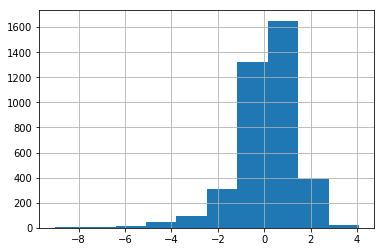

In [74]:
import numpy as np
df['Ratio H/L normalized 161205_1_19913'].apply(np.log2).hist()

In [48]:
df.columns

In [75]:
from ipywidgets import interact, interactive, fixed, interact_manual

def select_subject(subID):
    df_filtered= df[subID]
    ax = df_filtered.apply(np.log2).hist(color="orange")

subject = df.columns
interact(select_subject, subID=subject)

interactive(children=(Dropdown(description='subID', options=('Protein IDs', 'Majority protein IDs', 'Peptide c…

<function __main__.select_subject(subID)>

In [76]:
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions
0,A0A024QZX5;A0A087X1N8;P35237,A0A024QZX5;A0A087X1N8;P35237,8;8;8,7;7;7,7;7;7,Serpin B6,SERPINB6,A0A024QZX5_HUMAN Serpin B6 OS=Homo sapiens GN=...,3,8,...,7410;11821;12932;13458;21325;26237;26759;29148,True;True;True;True;True;True;True;False,7896;12616;13792;14361;22768;22769;28237;28800...,207900;332581;332582;332583;332584;332585;3325...,277914;277915;440952;440953;440954;440955;4409...,277914;440959;484050;506389;813394;960933;9770...,NaN,NaN,NaN,NaN
1,A0A024R216;Q9Y3E1;H3BPM9,A0A024R216;Q9Y3E1;H3BPM9,2;2;1,1;1;1,1;1;1,Hepatoma-derived growth factor-related protein 3,HDGFRP3,A0A024R216_HUMAN Hepatoma-derived growth facto...,3,2,...,11011;35042,True;False,11734;37667,307222;307223;307224;307225;307226;307227;3072...,407911;407912;407913;407914;407915;407916;4079...,407932;1308632,NaN,NaN,NaN,NaN
2,A0A024R4E5;Q00341;H0Y394;C9JZI8;C9J5E5;C9JIZ1;...,A0A024R4E5;Q00341,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,15;14;7;5;5;5;4;4;4;4;4;3;3;3;3;3;2;2;2;1;1,Vigilin,HDLBP,A0A024R4E5_HUMAN High density lipoprotein bind...,21,15,...,91;2644;4585;6021;11804;13719;13865;15797;1775...,True;True;True;True;True;True;True;True;True;T...,96;2844;4912;6440;12598;14633;14788;16893;1896...,2027;2028;2029;2030;2031;2032;2033;2034;2035;2...,2966;2967;2968;2969;2970;2971;2972;2973;2974;2...,2970;110671;180168;231490;440376;517753;524404...,NaN,NaN,NaN,NaN
3,A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4,A0A024R4M0;P46781;B5MCT8;C9JM19,11;11;8;8;2;2,11;11;8;8;2;2,11;11;8;8;2;2,40S ribosomal protein S9,RPS9,A0A024R4M0_HUMAN 40S ribosomal protein S9 OS=H...,6,11,...,7393;12908;13798;14304;16677;17573;17990;18804...,True;True;True;True;True;True;True;True;True;T...,7879;13766;14716;15265;17824;18783;19224;19225...,207641;207642;207643;207644;207645;207646;2076...,277666;277667;277668;277669;277670;277671;2776...,277677;483452;520425;544012;642553;676793;6889...,0,NaN,75,NaN
4,A0A024R6I7;A0A0G2JRN3;G3V2B9;G3V544,A0A024R6I7;A0A0G2JRN3,13;11;3;1,1;1;0;0,1;1;0;0,NaN,SERPINA1,A0A024R6I7_HUMAN Alpha-1-antitrypsin OS=Homo s...,4,13,...,3017;5464;9478;9731;16525;20370;20723;20838;21...,False;True;False;False;False;False;False;False...,3237;5848;10098;10368;17665;21762;22126;22247;...,89400;89401;89402;89403;89404;89405;89406;8940...,125648;125649;212495;212496;212497;212498;2124...,125649;212516;347545;355318;638194;777446;7881...,1;2,NaN,140;338,NaN


In [89]:
df["Uniprot"]= df["Protein IDs"].str.split(';').str[0]

In [90]:
df["Uniprot"]

0        A0A024QZX5
1        A0A024R216
2        A0A024R4E5
3        A0A024R4M0
4        A0A024R6I7
5        A0A024R7W5
6        A0A024RA52
7        A0A024RBT2
8        A0A024RCR6
9        A0A067XG54
10       A0A075B6F9
11       A0A087WV90
12       A0A075B6K8
13       A0A075B6L0
14       A0A075B6N8
15       A0A087WYJ9
16       A0A087X0P6
17       A0A075B738
18       A0A075B7B1
19       A0A075B7D9
20       A0A087WSW7
21           F8W809
22       A0A087WSZ2
23           K7ERP4
24       A0A087WT20
25           G3V4F2
26       A0A087WT99
27       A0A087WTA5
28       A0A087WTA8
29       A0A087WTC0
           ...     
5178    REV__Q15052
5179    REV__Q5RHP9
5180    REV__Q5SXM2
5181    REV__Q5T795
5182    REV__Q6DHV7
5183    REV__Q6P158
5184    REV__Q6UN15
5185    REV__Q6V0I7
5186    REV__Q7Z745
5187    REV__Q7Z7G8
5188    REV__Q86VS8
5189    REV__Q8NA54
5190    REV__Q8TB45
5191    REV__Q8TDJ6
5192    REV__Q8WVM8
5193    REV__Q96T58
5194    REV__Q9C0D4
5195    REV__Q9H7D0
5196    REV__Q9NQT8


In [91]:
df.iloc[[5205]]

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Deamidation (NQ) site positions,Oxidation (M) site positions,Uniprot
5205,V9GYF8,V9GYF8,8,1,1,NaN,GDI2,V9GYF8_HUMAN Rab GDP dissociation inhibitor be...,1,8,...,False;False;False;False;True;False;False;False,6166;10199;12862;23711;23712;23925;25294;35067...,165838;165839;165840;165841;165842;165843;1658...,222384;222385;222386;222387;222388;222389;2223...,222733;350340;447867;839148;842677;882012;1212...,NaN,354,NaN,110,V9GYF8


In [144]:
df_filtered=df[df['Uniprot']=="V9GYF8"]
df_filtered=df_filtered[df_filtered.columns[df_filtered.columns.str.startswith("Ratio H/L normalized ")]]
df_filtered.apply(np.log2).transpose()#.hist(color="red")

,5205
Ratio H/L normalized 161205_1_19913,NaN
Ratio H/L normalized 161205_10_29288,NaN
Ratio H/L normalized 161205_11_13476,NaN
Ratio H/L normalized 161205_12_22298,NaN
Ratio H/L normalized 161205_13_15972,NaN
Ratio H/L normalized 161205_14_16003,NaN
Ratio H/L normalized 161205_15_13187,NaN
Ratio H/L normalized 161205_16_2066,NaN
Ratio H/L normalized 161205_17_9657,NaN
Ratio H/L normalized 161205_18_14775,NaN


In [145]:
def select_uniprot(protID,ratioID):
    df_filtered= df[df['Uniprot']==protID]
    df_filtered=df_filtered[df_filtered.columns[df_filtered.columns.str.startswith(ratioID)]]
    ax = df_filtered.apply(np.log2).transpose().hist(color="brown")

uniprot = df['Uniprot']
ratio = "Ratio H/L normalized "
interact(select_uniprot, protID=uniprot, ratioID=ratio)

interactive(children=(Dropdown(description='protID', options=('A0A024QZX5', 'A0A024R216', 'A0A024R4E5', 'A0A02…

<function __main__.select_uniprot(protID, ratioID)>

In [205]:
df_filtered=df[df.columns[df.columns.str.startswith(ratio)]]
df_filtered.columns=df_filtered.columns.str.replace(ratio,'')
df_filtered.columns=df_filtered.columns.str.replace('161205_','')
df_filtered.index = df['Uniprot']
df_filtered=df_filtered.transpose()
df_filtered.head()

Uniprot,A0A024QZX5,A0A024R216,A0A024R4E5,A0A024R4M0,A0A024R6I7,A0A024R7W5,A0A024RA52,A0A024RBT2,A0A024RCR6,A0A067XG54,...,REV__Q9Y2I7,REV__Q9Y3R5,S4R3H4,S4R3K8,S4R3N1,S4R435,V9GY48,V9GYF8,X5CMH5,X6RCR8
1_19913,0.38338,NaN,1.2687,0.63993,NaN,2.2948,0.81503,1.37300,1.2593,NaN,...,1.2842,NaN,2.8192,3.69600,1.01980,0.55618,NaN,NaN,NaN,0.21253
10_29288,0.23249,NaN,1.2252,0.62633,NaN,1.4775,0.87058,0.85808,1.1334,NaN,...,NaN,NaN,3.1919,0.99804,0.74742,0.69395,0.39754,NaN,0.44832,NaN
11_13476,0.42765,0.67241,3.3145,1.25510,NaN,2.5344,1.09830,1.76120,1.7492,NaN,...,3.5670,NaN,1.2376,1.38180,2.61040,0.72506,0.35650,NaN,1.28190,NaN
12_22298,0.34455,0.91027,1.5971,0.51983,NaN,2.3883,0.61350,1.75680,1.0811,NaN,...,NaN,NaN,2.8007,1.53840,1.41320,0.62288,NaN,NaN,0.29058,0.36903
13_15972,0.18053,0.47880,0.5860,0.74478,0.17125,1.4385,0.77485,0.75018,1.3331,NaN,...,1.0234,NaN,1.5591,1.33350,0.85892,0.74305,0.73694,NaN,0.18760,NaN


In [191]:
subjects = pd.read_csv('https://docs.google.com/spreadsheets/d/'+'103ZjypVTJtDLgu-svyo6bdeeNo9392olmfuXJA_xhRs'+'/export?gid=0&format=csv', index_col=0 )
subjects.head()

,Transformert (T) og Ikke-T (IT),transformasjon,Group3,Group4,Group27
Name,,,,,
23_11087,T,1,HR,HR,T
27_11426,T,1,HR,HR,T
4_16041,T,1,HR,HR,T
30_19693,T,1,HR,HR,T
20_30488,T,1,HR,HR,T


In [206]:
df_filtered.index.name="Name"

In [208]:
df_filtered=pd.merge(subjects,df_filtered,how='right', on='Name')

In [226]:
uniprots = pd.read_csv('https://docs.google.com/spreadsheets/d/'+'1U0IXQpjpN3Jhi9GRACCILMBJlTltnTssHxQuoNVD7Ac'+'/export?gid=0&format=csv')
uniprots.describe()

,Group,Uniprot,Henrik,Lars,Mirta1,Mirta2,Mirta3,Ani,Ani2,Ani3,Henrik2
count,9,9,7,5,24,34,28,6,4,5,10
unique,4,9,7,5,24,34,28,6,4,5,10
top,VR,P51003,O95551,O75995,P02730,Q03164,Q8TEQ0,CON__Q28065,D6R9P4,Q5JRG1,O95551
freq,3,1,1,1,1,1,1,1,1,1,1


In [209]:
df_filtered.columns

Index(['Transformert (T) og Ikke-T (IT)', 'transformasjon', 'Group3', 'Group4',
       'Group27', 'A0A024QZX5', 'A0A024R216', 'A0A024R4E5', 'A0A024R4M0',
       'A0A024R6I7',
       ...
       'REV__Q9Y2I7', 'REV__Q9Y3R5', 'S4R3H4', 'S4R3K8', 'S4R3N1', 'S4R435',
       'V9GY48', 'V9GYF8', 'X5CMH5', 'X6RCR8'],
      dtype='object', length=5213)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8aefde1ef0>,
      dtype=object)

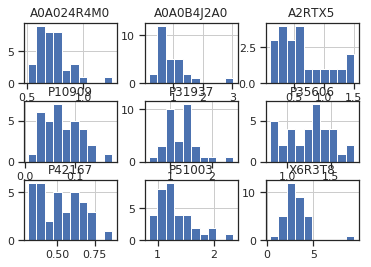

In [227]:
protn=uniprots['Uniprot']
df_filtered[df_filtered.columns.intersection(protn)].hist()
#protn=df[df['Uniprot'].isin(protn)].iloc[:,:35].transpose()

In [217]:
#protn[protn.Remove!="NaN"].count()

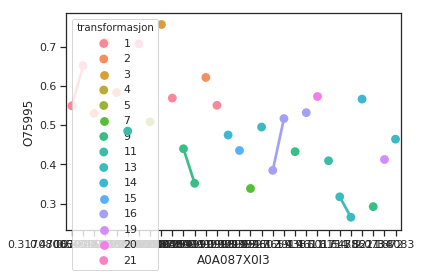

In [228]:
import seaborn as sb
sb.set(style="ticks", color_codes=True)
sb.pointplot('A0A087X0I3','O75995',hue='transformasjon',data=df_filtered)
#gp = sb.pairplot(protid.fillna(0)[protn],hue="Lymphoma")
#protid = protid.drop('Subject', 1)
#protid = protid.drop('Suff', 1)
#protid = protid.drop('Prefix', 1)

In [18]:
!pip install git+https://github.com/fastai/fastai

  Cloning https://github.com/fastai/fastai to /tmp/pip-req-build-tzwpomvx
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5s9rdd8/wheels/83/30/a0/6fa8a74c9f5a5ab45cdc84e9f9ed56d8a72750e11ebf50a364
Successfully built fastai


In [ ]:
!pip install --upgrade pip

In [32]:
!pip install fastai==0.7.0  #https://forums.fast.ai/t/no-module-named-fastai-structured-google-colab/23820/2

    100% |████████████████████████████████| 122kB 1.4MB/s 
    100% |████████████████████████████████| 496.4MB 38kB/s 
    100% |████████████████████████████████| 122kB 3.8MB/s 
pytorch-pretrained-bert 0.3.0 has requirement torch>=0.4.1, but you'll have torch 0.3.1 which is incompatible.
pyro-ppl 0.2.1 has requirement torch>=0.4.0, but you'll have torch 0.3.1 which is incompatible.
allennlp 0.8.0 has requirement pytz==2017.3, but you'll have pytz 2018.5 which is incompatible.
allennlp 0.8.0 has requirement torch>=0.4.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: fastai 1.0.46.dev0
    Uninstalling fastai-1.0.46.dev0:
      Successfully uninstalled fastai-1.0.46.dev0


In [58]:
import torch
torch.cuda.set_device(0)

In [59]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
?plot
x=-2*pi:2*pi:100
plot(sin(x)*cos(x),type="l",color="blue")

In [ ]:
%%perl
open(F,"/LymphonaLog2LHsilacTrp.txt");
while(<F>){
    print join(",",split(/\t/,$_))
}


In [ ]:
%%bash
ls $HOME/promec/Animesh/Lymphoma